## IBM DATA SCIENCE PROFESSIONAL CERTIFICATE

### COURSE 9 - WEEK 3 - CAPSTONE PROJECT

#### YAN CARLOMAGNO

# Problem 1

Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

#### Step 1: scrape data from Wikipedia Page:

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [6]:
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')

#### Step 2: create pandas DataFrame with PostalCode, Borough, Neighborhood as columns names

In [7]:
column_names = ['PostalCode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)
df

,PostalCode,Borough,Neighborhood


#### Step 3: search wiki and save data to dataframe

In [9]:
for tr in table.find_all('tr'):
    row_data = []
    for td in tr.find_all('td'):
        row_data.append(td.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
355,M5Z,Not assigned,Not assigned
356,M6Z,Not assigned,Not assigned
357,M7Z,Not assigned,Not assigned
358,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


#### Step 4: data cleaning

- Drop Borough with "Not assigned" values
- Replace Neighborhood with "Not assigned" values with Borough value

In [11]:
df = df[df['Borough'] != 'Not assigned'].reset_index(drop=True)
df = df.groupby(['PostalCode', 'Borough'], as_index=False).agg(lambda x: ','.join(x))
temp = df['Neighborhood'] == 'Not assigned'
df.loc[temp, 'Neighborhood'] = df.loc[temp, 'Borough']
df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge,Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek,Rouge H..."
2,M1E,Scarborough,"Guildwood, Morningside, West Hill,Guildwood, M..."
3,M1G,Scarborough,"Woburn,Woburn"
4,M1H,Scarborough,"Cedarbrae,Cedarbrae"
...,...,...,...
98,M9N,York,"Weston,Weston"
99,M9P,Etobicoke,"Westmount,Westmount"
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [12]:
df.shape

(103, 3)

# Problem 2

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:

In [ ]:
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

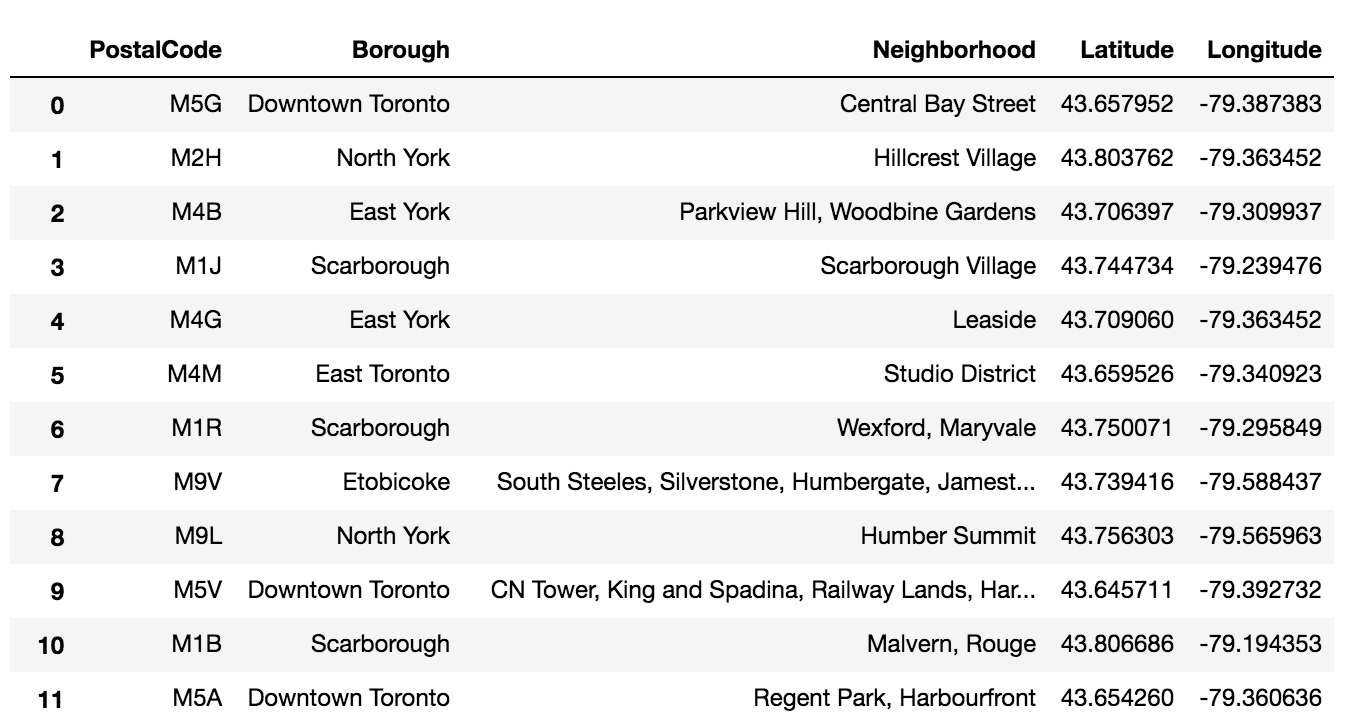

**Important Note:** There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

In [13]:
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

In [14]:
geo_df=pd.read_csv('http://cocl.us/Geospatial_data')
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [15]:
geo_df.rename(columns={'Postal Code':'PostalCode'}, inplace = True)
data_merge = pd.merge(geo_df, df, on = 'PostalCode')
data_merge

,PostalCode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge,Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek,Rouge H..."
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill,Guildwood, M..."
3,M1G,43.770992,-79.216917,Scarborough,"Woburn,Woburn"
4,M1H,43.773136,-79.239476,Scarborough,"Cedarbrae,Cedarbrae"
...,...,...,...,...,...
98,M9N,43.706876,-79.518188,York,"Weston,Weston"
99,M9P,43.696319,-79.532242,Etobicoke,"Westmount,Westmount"
100,M9R,43.688905,-79.554724,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,43.739416,-79.588437,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [16]:
df = data_merge[['PostalCode','Borough','Neighborhood','Latitude','Longitude']]
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge,Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek,Rouge H...",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill,Guildwood, M...",43.763573,-79.188711
3,M1G,Scarborough,"Woburn,Woburn",43.770992,-79.216917
4,M1H,Scarborough,"Cedarbrae,Cedarbrae",43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,"Weston,Weston",43.706876,-79.518188
99,M9P,Etobicoke,"Westmount,Westmount",43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


# Problem 3:

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

- To add enough Markdown cells to explain what you decided to do and to report any observations you make. 
- To generate maps to visualize your neighborhoods and how they cluster together. 

Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

In [27]:
# import dependencies:

import pandas as pd
import numpy as np
import requests
import os
from sklearn.cluster import KMeans
!pip install folium
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


#### Step 1: use geopy library to get the latitude and longitude values of Toronto:

In [62]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Step 2: plot Toronto's neighborhoods:

In [63]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Step 3: define and request Foursquare's API credentials:

In [64]:
# The code was removed by Watson Studio for sharing.

#### Step 4: explore the first neighborhood in the dataframe:

In [65]:
df.loc[0, 'Neighborhood'] #Get the neighborhood's name

'Malvern, Rouge,Malvern, Rouge'

In [66]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Malvern, Rouge,Malvern, Rouge are 43.806686299999996, -79.19435340000001.


#### Step 5: get top 100 venues in the neighborhood within a radius of 500 meters:

In [67]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff1356a5c2c4d623f8d1b76'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': 'Wendy’s',
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [68]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [69]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056


##### Step 6: explore neighborhoods in Toronto

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Malvern, Rouge,Malvern, Rouge
Rouge Hill, Port Union, Highland Creek,Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill,Guildwood, Morningside, West Hill
Woburn,Woburn
Cedarbrae,Cedarbrae
Scarborough Village,Scarborough Village
Kennedy Park, Ionview, East Birchmount Park,Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge,Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West,Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West,Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre,Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale,Wexford, Maryvale
Agincourt,Agincourt
Clarks Corners, Tam O'Shanter, Sullivan,Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East,Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West,Steeles West, L'Amoreaux West
Upper Rouge,Upper Rouge
Hill

In [72]:
print(toronto_venues.shape)
toronto_venues.head()

(2130, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge,Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek,Rouge H...",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
2,"Rouge Hill, Port Union, Highland Creek,Rouge H...",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood, Morningside, West Hill,Guildwood, M...",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill,Guildwood, M...",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [73]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Agincourt,Agincourt",4,4,4,4,4,4
"Alderwood, Long Branch,Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North,Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
"Bayview Village,Bayview Village",4,4,4,4,4,4
"Bedford Park, Lawrence Manor East,Bedford Park, Lawrence Manor East",26,26,26,26,26,26
...,...,...,...,...,...,...
"Willowdale, Willowdale East,Willowdale, Willowdale East",35,35,35,35,35,35
"Willowdale, Willowdale West,Willowdale, Willowdale West",5,5,5,5,5,5
"Woburn,Woburn",3,3,3,3,3,3


In [74]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 271 unique categories.


#### Step 7: analyze each neighborhood

In [75]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
toronto_onehot.shape

(2130, 271)

In [53]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Agincourt,Agincourt",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch,Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview Nort...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,"Bayview Village,Bayview Village",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East,Bedford Park...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,"Willowdale, Willowdale East,Willowdale, Willow...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.028571,0.0,0.0,0.0,0.0,0.0
91,"Willowdale, Willowdale West,Willowdale, Willow...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
92,"Woburn,Woburn",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
93,"Woodbine Heights,Woodbine Heights",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [78]:
toronto_grouped.shape

(95, 271)

In [79]:

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt,Agincourt----
                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3               Skating Rink  0.25
4              Metro Station  0.00


----Alderwood, Long Branch,Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.33
1             Pub  0.17
2             Gym  0.17
3  Sandwich Place  0.17
4     Coffee Shop  0.17


----Bathurst Manor, Wilson Heights, Downsview North,Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0  Coffee Shop  0.09
1         Bank  0.09
2  Pizza Place  0.05
3  Gas Station  0.05
4     Pharmacy  0.05


----Bayview Village,Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4                Motel  0.00


----Bedford Park, Lawrence Manor East,Bedford Park, Lawrence Manor East----
                venue  freq
0  Itali

In [80]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [81]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agincourt,Agincourt",Breakfast Spot,Latin American Restaurant,Lounge,Skating Rink,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,"Alderwood, Long Branch,Alderwood, Long Branch",Pizza Place,Gym,Coffee Shop,Sandwich Place,Pub,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview Nort...",Bank,Coffee Shop,Sandwich Place,Supermarket,Ice Cream Shop,Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Shopping Mall,Deli / Bodega
3,"Bayview Village,Bayview Village",Café,Bank,Chinese Restaurant,Japanese Restaurant,Women's Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run
4,"Bedford Park, Lawrence Manor East,Bedford Park...",Coffee Shop,Pizza Place,Sandwich Place,Italian Restaurant,Thai Restaurant,Indian Restaurant,Butcher,Café,Sushi Restaurant,Pub


#### Step 8: cluster neighborhoods

In [82]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [83]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge,Malvern, Rouge",43.806686,-79.194353,3.0,Fast Food Restaurant,Department Store,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek,Rouge H...",43.784535,-79.160497,1.0,Construction & Landscaping,Bar,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
2,M1E,Scarborough,"Guildwood, Morningside, West Hill,Guildwood, M...",43.763573,-79.188711,1.0,Medical Center,Electronics Store,Restaurant,Breakfast Spot,Rental Car Location,Intersection,Bank,Distribution Center,Diner,Discount Store
3,M1G,Scarborough,"Woburn,Woburn",43.770992,-79.216917,4.0,Coffee Shop,Korean BBQ Restaurant,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Drugstore
4,M1H,Scarborough,"Cedarbrae,Cedarbrae",43.773136,-79.239476,1.0,Fried Chicken Joint,Gas Station,Hakka Restaurant,Bakery,Athletics & Sports,Bank,Caribbean Restaurant,Thai Restaurant,Dim Sum Restaurant,Diner


In [93]:
# drop NaN values and convert 'Cluster Labels' column to integer to avoid error on next step:
toronto_merged = toronto_merged.dropna()
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [94]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

That's all folks! =)